The shape of the original magnitude torch.Size([1, 128, 38])
The shape of the padded magnitude torch.Size([1, 128, 64])
The shape of the original magnitude torch.Size([1, 128, 40])
The shape of the padded magnitude torch.Size([1, 128, 64])
3
3
Batch 1:


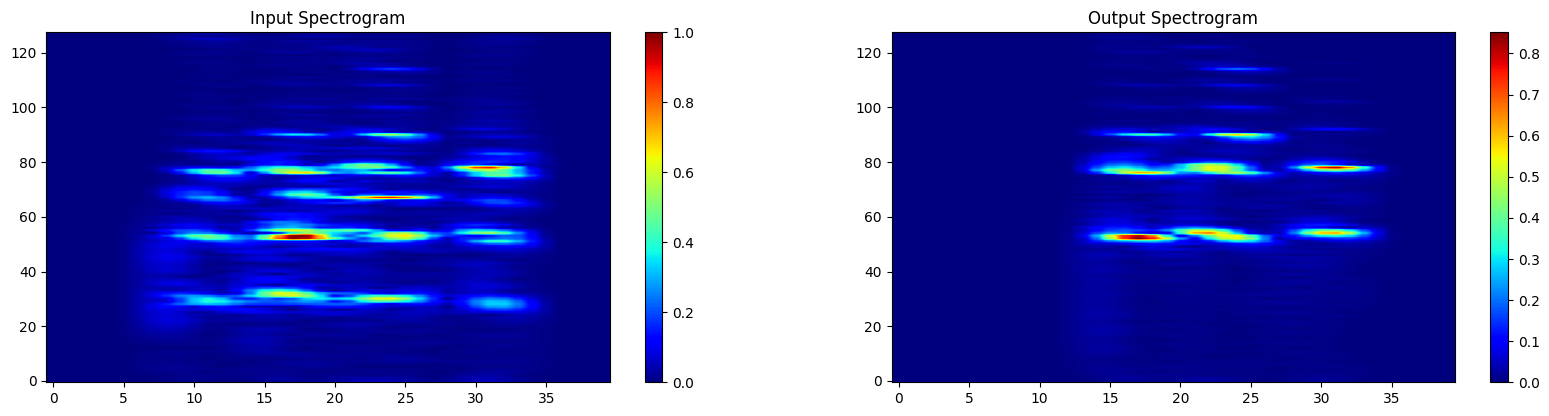

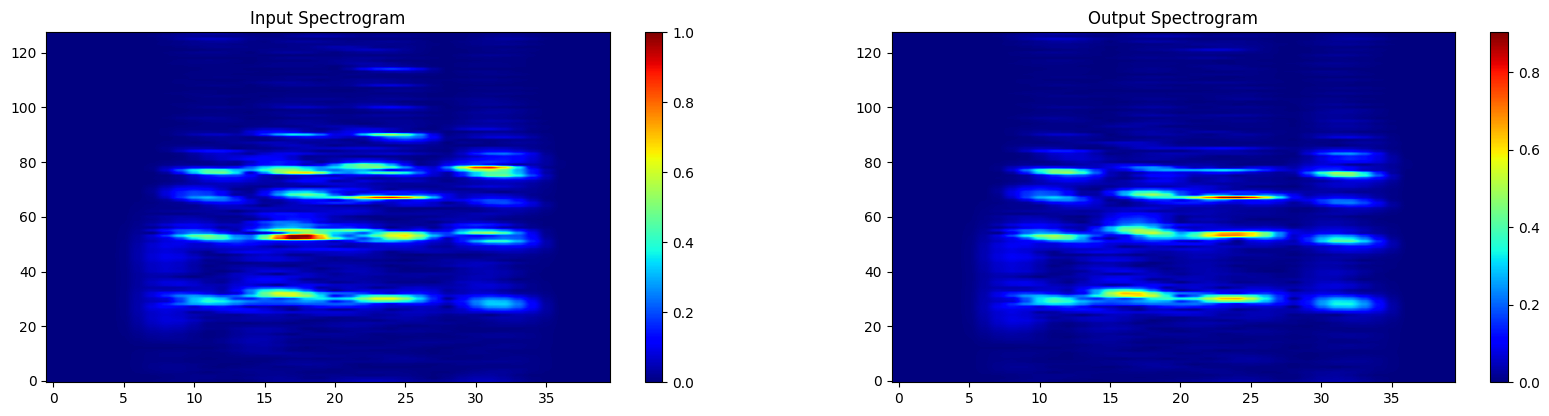

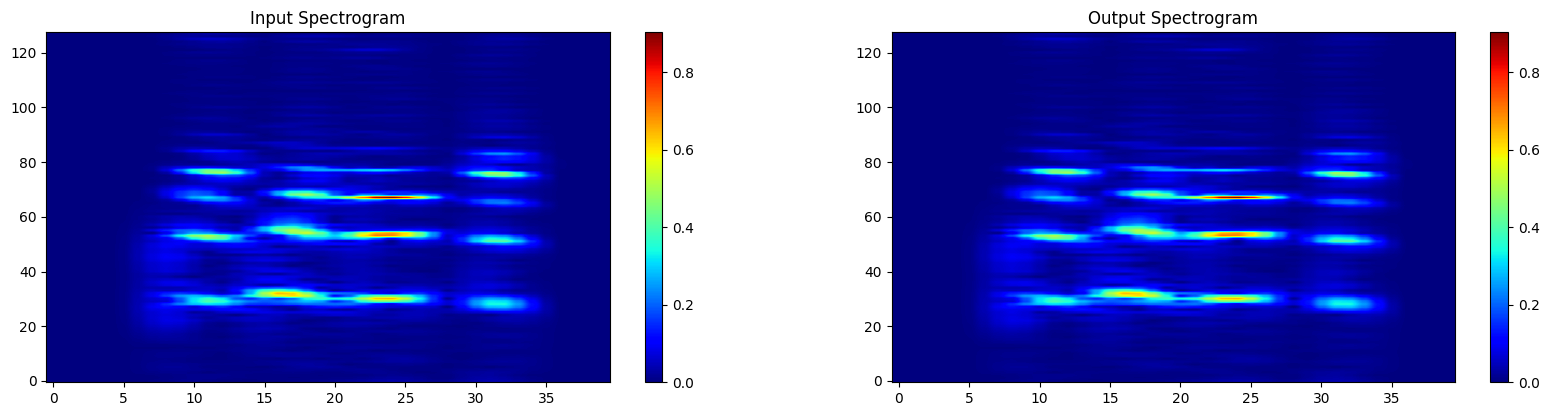

In [2]:
from dataset import Edinb_SE_Dataset
import torch

dataset = Edinb_SE_Dataset("/home/karan/sda_link/datasets/Ferret_data/Dataset_2/F_mixed_16KHz", 
                        "/home/karan/sda_link/datasets/Ferret_data/Dataset_2/Mixed_16KHz", 
                        pad = True)
train_loader = torch.utils.data.DataLoader(dataset= dataset,
                                            batch_size= 2,
                                            shuffle=True,
                                            collate_fn = dataset.collate_batch_coherence_net,
                                            pin_memory=True,
                                            num_workers=0)
u = 0
for i, data in enumerate(train_loader):
    print(f"Batch {i+1}:")
    input_spec, output_spec, indicator, phase_mixed, raw_wavs_target, speaker_ids = data

    import matplotlib.pyplot as plt
    # display the spectrogram of the input and output
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(input_spec[1].squeeze(0).numpy(), aspect='auto', origin='lower', cmap='jet')
    plt.title('Input Spectrogram')
    plt.colorbar()
    plt.subplot(2, 2, 2)
    plt.imshow(output_spec[1].squeeze(0).numpy(), aspect='auto', origin='lower', cmap = 'jet')
    plt.title('Output Spectrogram')
    plt.colorbar()
    plt.show()

    # display the spectrogram of the input and output
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(input_spec[0].squeeze(0).numpy(), aspect='auto', origin='lower', cmap='jet')
    plt.title('Input Spectrogram')
    plt.colorbar()
    plt.subplot(2, 2, 2)
    plt.imshow(output_spec[0].squeeze(0).numpy(), aspect='auto', origin='lower', cmap = 'jet')
    plt.title('Output Spectrogram')
    plt.colorbar()
    plt.show()

    # display the spectrogram of the input and output
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(input_spec[2].squeeze(0).numpy(), aspect='auto', origin='lower', cmap='jet')
    plt.title('Input Spectrogram')
    plt.colorbar()
    plt.subplot(2, 2, 2)
    plt.imshow(output_spec[2].squeeze(0).numpy(), aspect='auto', origin='lower', cmap = 'jet')
    plt.title('Output Spectrogram')
    plt.colorbar()
    plt.show()

    u += 1  
    if u == 1:
        break


In [3]:
output_spec.shape

torch.Size([6, 1, 128, 40])

: 

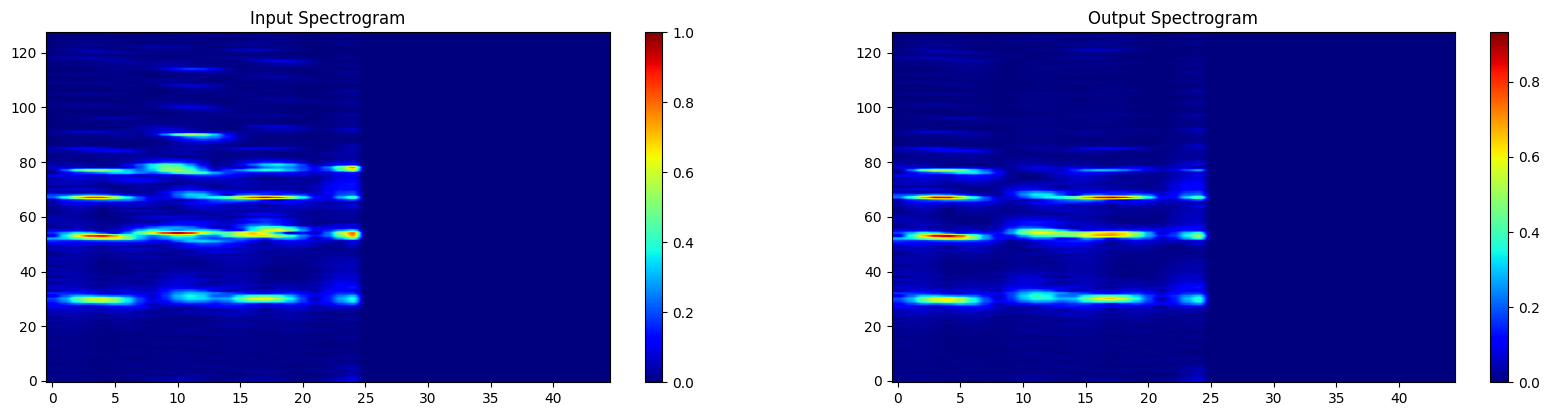

In [33]:
# display the spectrogram of the input and output
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.imshow(input_spec[0].squeeze(0).numpy(), aspect='auto', origin='lower', cmap='jet')
plt.title('Input Spectrogram')
plt.colorbar()
plt.subplot(2, 2, 2)
plt.imshow(output_spec[0].squeeze(0).numpy(), aspect='auto', origin='lower', cmap = 'jet')
plt.title('Output Spectrogram')
plt.colorbar()
plt.show()

In [4]:
speaker_ids

['noisy_mlu_mchi_mli_mti-m200-flo_fku_fti',
 'clean_mlu_mchi_mli_mti-m200-flo_fku_fti']

In [2]:
input_spec.shape, output_spec.shape

(torch.Size([2, 1, 128, 64]), torch.Size([2, 1, 128, 64]))

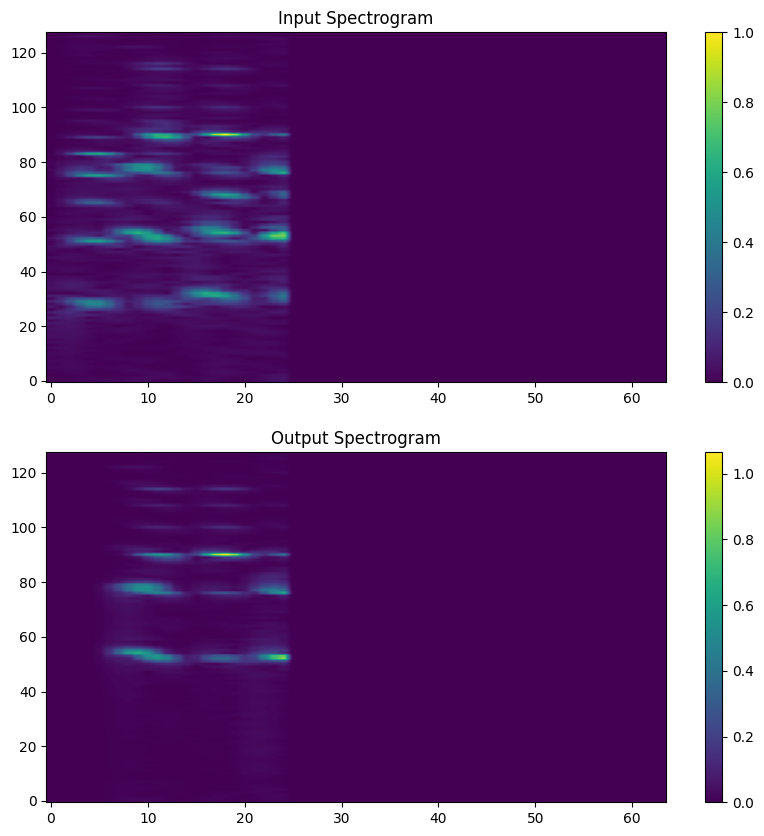

In [3]:
import matplotlib.pyplot as plt

# display the spectrogram of the input and output
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.imshow(input_spec[1].squeeze(0).numpy(), aspect='auto', origin='lower')
plt.title('Input Spectrogram')
plt.colorbar()
plt.subplot(2, 1, 2)
plt.imshow(output_spec[1].squeeze(0).numpy(), aspect='auto', origin='lower')
plt.title('Output Spectrogram')
plt.colorbar()
plt.show()


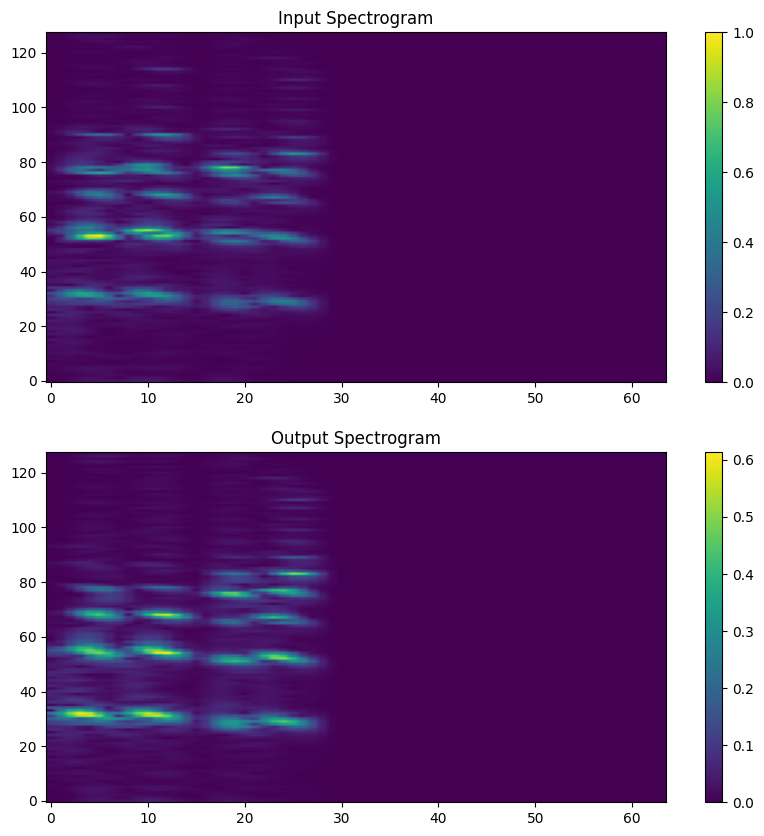

In [6]:
import matplotlib.pyplot as plt

# display the spectrogram of the input and output
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.imshow(input_spec[0].squeeze(0).numpy(), aspect='auto', origin='lower')
plt.title('Input Spectrogram')
plt.colorbar()
plt.subplot(2, 1, 2)
plt.imshow(output_spec[0].squeeze(0).numpy(), aspect='auto', origin='lower')
plt.title('Output Spectrogram')
plt.colorbar()
plt.show()


In [7]:
indicator, , raw_wavs_target, speaker_ids

SyntaxError: invalid syntax (542710212.py, line 1)

In [9]:
import numpy as np
def gen_log_space(limit, n):
    result = [1]
    if n>1:  # just a check to avoid ZeroDivisionError
        ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    while len(result)<n:
        next_value = result[-1]*ratio
        if next_value - result[-1] >= 1:
            # safe zone. next_value will be a different integer
            result.append(next_value)
        else:
            # problem! same integer. we need to find next_value by artificially incrementing previous value
            result.append(result[-1]+1)
            # recalculate the ratio so that the remaining values will scale correctly
            ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    # round, re-adjust to 0 indexing (i.e. minus 1) and return np.uint64 array
    return np.array(list(map(lambda x: round(x)-1, result)), dtype=np.int64)

y_log = gen_log_space(512, 256)

In [10]:
y_log

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 119,
       120, 121, 122, 124, 125, 126, 128, 129, 130, 132, 133, 135, 136,
       137, 139, 140, 142, 143, 145, 146, 148, 150, 151, 153, 154, 156,
       158, 159, 161, 163, 164, 166, 168, 170, 171, 173, 175, 177, 179,
       181, 183, 185, 187, 189, 190, 193, 195, 197, 199, 201, 203, 205,
       207, 209, 212, 214, 216, 218, 221, 223, 225, 228, 230, 23

In [37]:
import torchaudio

# Load the audio files
mixed_wav, sr_mixed_wav = torchaudio.load("/home/karan/sda_link/datasets/Ferret_data/Dataset_2/Mixed_16KHz/mlu_mchi_mli_mti-m200-flo_fku_fti.wav")
clean_wav, sr_clean_wav = torchaudio.load("/home/karan/sda_link/datasets/Ferret_data/Dataset_2/F_mixed_16KHz/mlu_mchi_mli_mti-m200-flo_fku_fti.wav")

# Calculate the padding length in samples (0.2 seconds * sample rate)
padding_length = int(0.2 * sr_mixed_wav)

# Create padding tensor of zeros for both the start and end
padding = torch.zeros(padding_length, dtype=mixed_wav.dtype).reshape(1, -1)

# Pad the signals
mixed_wav_padded = torch.cat((padding, mixed_wav, padding), dim=1)
clean_wav_padded = torch.cat((padding, clean_wav, padding), dim=1)

In [39]:
import torchaudio
import torch

# Assuming you have your audio waveform as a tensor `waveform` and the sampling rate as `sample_rate`

cutoff_freq = 2000  # Low-pass filter cutoff frequency in Hz

# Create a low-pass biquad filter using torchaudio
lowpass_filter = torchaudio.functional.lowpass_biquad(mixed_wav_padded,
    sample_rate=16000,
    cutoff_freq=cutoff_freq,
)

clean_filtered = torchaudio.functional.lowpass_biquad(clean_wav,
    sample_rate=16000,
    cutoff_freq=cutoff_freq,
)


In [40]:
import IPython.display as ipd

# Play the mixed_wav audio
ipd.display(ipd.Audio(mixed_wav.numpy(), rate=sr_mixed_wav))

# Play the clean_wav audio
ipd.display(ipd.Audio(clean_wav.numpy(), rate=sr_clean_wav))

ipd.display(ipd.Audio(lowpass_filter.numpy(), rate=sr_clean_wav))

In [41]:
from config import SE_Config
window = torch.hann_window(SE_Config.L_FRAME)
mixed_spec = torch.stft(lowpass_filter, 
                        hop_length= 512, 
                        n_fft= SE_Config.L_FRAME, 
                        window= window, 
                        return_complex= True) # Shape is [1, 2049, T]

clean_spec = torch.stft(clean_filtered, 
                        hop_length= 512, 
                        n_fft= SE_Config.L_FRAME, 
                        window= window, 
                        return_complex= True) # Shape is [1, 2049, T]
print(mixed_spec.shape, y_log.shape)

clean_spec_mag = torch.abs(clean_spec)

torch.Size([1, 2049, 39]) (256,)


In [42]:
mixed_spec.shape, clean_spec.shape

(torch.Size([1, 2049, 39]), torch.Size([1, 2049, 27]))

In [43]:
SE_Config.L_HOP, SE_Config.L_FRAME

(512, 4096)

In [44]:
4096*2

8192

In [45]:
8000/2049

3.904343582235237

In [46]:
from config import SE_Config

In [47]:
y_log

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 119,
       120, 121, 122, 124, 125, 126, 128, 129, 130, 132, 133, 135, 136,
       137, 139, 140, 142, 143, 145, 146, 148, 150, 151, 153, 154, 156,
       158, 159, 161, 163, 164, 166, 168, 170, 171, 173, 175, 177, 179,
       181, 183, 185, 187, 189, 190, 193, 195, 197, 199, 201, 203, 205,
       207, 209, 212, 214, 216, 218, 221, 223, 225, 228, 230, 23

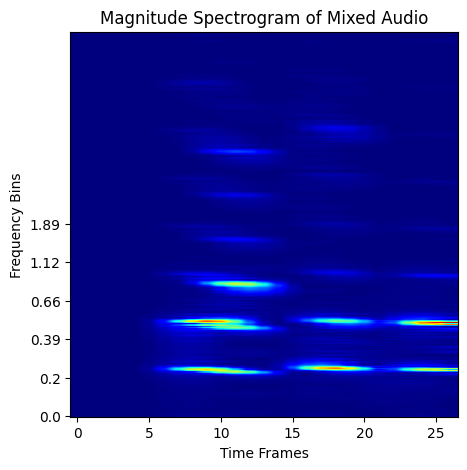

In [48]:
import matplotlib.pyplot as plt

# Convert mixed_spec from complex to magnitude for plotting
mixed_spec_mag = torch.abs(mixed_spec)

# Plot the magnitude spectrogram
plt.figure(figsize=(5,5))
plt.imshow(clean_spec_mag[0,:500,:].detach().numpy(), cmap='jet', aspect='auto', origin='lower')
#plt.yticks(y_log, [i*8000/2049 for  i in y_log])
plt.yticks([i for i in range(0, 256, 50)], [round(y_log[i]*(8000/2050)/1000, 2) for i in range(0, 256, 50)])
plt.title('Magnitude Spectrogram of Mixed Audio')
plt.xlabel('Time Frames')
plt.ylabel('Frequency Bins')
plt.show()


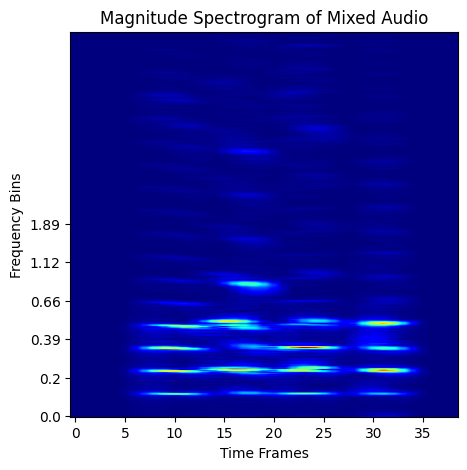

In [49]:
import matplotlib.pyplot as plt

# Convert mixed_spec from complex to magnitude for plotting
mixed_spec_mag = torch.abs(mixed_spec)

# Plot the magnitude spectrogram
plt.figure(figsize=(5,5))
plt.imshow(mixed_spec_mag[0,:500,:].detach().numpy(), cmap='jet', aspect='auto', origin='lower')
#plt.yticks(y_log, [i*8000/2049 for  i in y_log])
plt.yticks([i for i in range(0, 256, 50)], [round(y_log[i]*(8000/2050)/1000, 2) for i in range(0, 256, 50)])
plt.title('Magnitude Spectrogram of Mixed Audio')
plt.xlabel('Time Frames')
plt.ylabel('Frequency Bins')
plt.show()


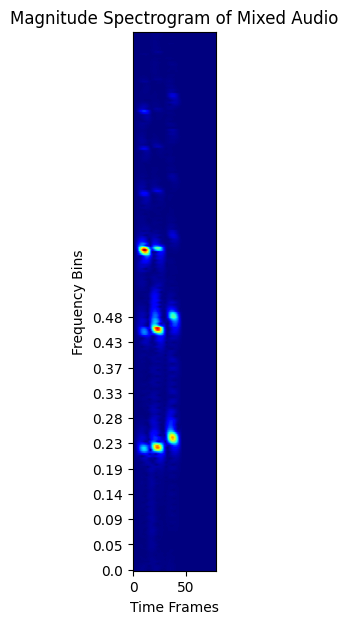

In [129]:
import matplotlib.pyplot as plt

# Convert mixed_spec from complex to magnitude for plotting
mixed_spec_mag = torch.abs(mixed_spec)

# Plot the magnitude spectrogram
plt.figure(figsize=(5, 7))
plt.imshow(clean_spec_mag[0,y_log,:].detach().numpy(), cmap='jet', aspect='2', origin='lower')
#plt.yticks(y_log, [i*8000/2049 for  i in y_log])
plt.yticks([i for i in range(0, 128, 12)], [round(y_log[i]*(8000/2050)/1000, 2) for i in range(0, 128, 12)])
plt.title('Magnitude Spectrogram of Mixed Audio')
plt.xlabel('Time Frames')
plt.ylabel('Frequency Bins')
plt.show()


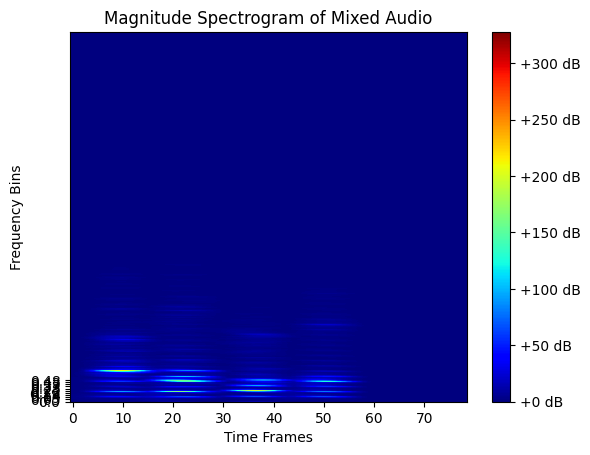

In [30]:
import matplotlib.pyplot as plt

# Convert mixed_spec from complex to magnitude for plotting
mixed_spec_mag = torch.abs(mixed_spec)

# Plot the magnitude spectrogram
#plt.figure(figsize=(5, 7))
plt.imshow(mixed_spec_mag[0,:,:].detach().numpy(), cmap='jet', aspect='auto', origin='lower')
#plt.yticks(y_log, [i*8000/2049 for  i in y_log])
plt.yticks([i for i in range(0, 128, 12)], [round(y_log[i]*(8000/2050)/1000, 2) for i in range(0, 128, 12)])
plt.title('Magnitude Spectrogram of Mixed Audio')
plt.xlabel('Time Frames')
plt.ylabel('Frequency Bins')
plt.colorbar(format='%+2.0f dB')
plt.show()


In [32]:
mixed_spec_mag.shape

torch.Size([1, 2049, 79])